<a href="https://colab.research.google.com/github/ABDOULAYEDIOP150/TP_SVM/blob/main/Louvain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Méthode de Louvain

Generer un graphe  en spécifiant le nombre de noeuds et  de  liens



*   Réseau de taille réduite



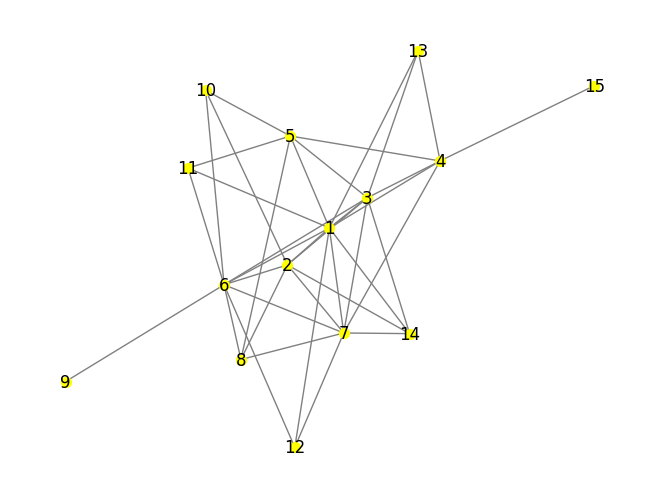

In [20]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Définir la graine aléatoire
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

taille = 15
link = 40

# Créez un graphe Erdős-Rényi dans igraph avec une graine aléatoire fixe via NumPy
edges = np.random.choice(taille * (taille - 1) // 2, size=link, replace=False)
g = ig.Graph()
g.add_vertices(taille)

edge_list = []
for edge in edges:
    i = edge // (taille - 1)
    j = edge % (taille - 1)
    if j >= i:
        j += 1
    edge_list.append((i, j))

g.add_edges(edge_list)

# Convertir en graphe NetworkX
G_nx = nx.Graph(g.get_edgelist())

# Utiliser une graine fixe pour le layout de spring
pos = nx.spring_layout(G_nx, seed=seed_value)

# Dessiner le graphe avec NetworkX et Matplotlib
nx.draw(G_nx, pos, with_labels=False, node_size=50, node_color="yellow", edge_color="gray")

# Numéroter les nœuds de 1 à 15
labels = {i: str(i + 1) for i in range(taille)}
nx.draw_networkx_labels(G_nx, pos, labels=labels)

# Afficher le graphe
plt.show()


### Matrice  d'adjacence

In [21]:
adjacency_matrix_ig = g.get_adjacency()
#print(adjacency_matrix_ig)
import pandas as pd
df = pd.DataFrame(adjacency_matrix_ig, columns=[f'N{i+1}' for i in range(15)], index=[f'N{i+1}' for i in range(15)])

# Afficher le DataFrame
print(df)

     N1  N2  N3  N4  N5  N6  N7  N8  N9  N10  N11  N12  N13  N14  N15
N1    0   1   1   1   1   1   1   0   0    0    1    1    1    1    0
N2    1   0   1   0   0   1   1   1   0    1    0    0    0    1    0
N3    1   1   0   2   1   1   1   0   0    0    0    0    1    1    0
N4    1   0   2   0   1   0   1   0   0    0    0    0    1    0    1
N5    1   0   1   1   0   0   0   1   0    1    1    0    0    0    0
N6    1   1   1   0   0   0   1   2   1    1    1    1    0    0    0
N7    1   1   1   1   0   1   0   1   0    0    0    1    0    1    0
N8    0   1   0   0   1   2   1   0   0    0    0    0    0    0    0
N9    0   0   0   0   0   1   0   0   0    0    0    0    0    0    0
N10   0   1   0   0   1   1   0   0   0    0    0    0    0    0    0
N11   1   0   0   0   1   1   0   0   0    0    0    0    0    0    0
N12   1   0   0   0   0   1   1   0   0    0    0    0    0    0    0
N13   1   0   1   1   0   0   0   0   0    0    0    0    0    0    0
N14   1   1   1   0 



*   Réseau de grandes tailles



Modularité du partitionnement : 0.4969
Communauté 1: 89 nœuds - [0, 20, 106, 317, 398, 556, 575, 634, 653, 746, 793, 1009, 1075, 1101, 1359, 2075, 2088, 2140, 2347, 2396, 2465, 2685, 2770, 2903, 2952, 3012, 3136, 3176, 3238, 3330, 3523, 3625, 3685, 3732, 3853, 3874, 3969, 3994, 4129, 4206, 4316, 4461, 4513, 4559, 4620, 4647, 4957, 4993, 5054, 5230, 5300, 5502, 5699, 5700, 5817, 5961, 5968, 5992, 6067, 6113, 6176, 6360, 6536, 7173, 7208, 7234, 7406, 7489, 7720, 7743, 7882, 7956, 8123, 8127, 8136, 8307, 8362, 8417, 8680, 8783, 8836, 9051, 9133, 9219, 9408, 9441, 9536, 9540, 9550]
Communauté 2: 294 nœuds - [1, 41, 49, 58, 79, 83, 104, 110, 164, 169, 276, 282, 324, 506, 515, 520, 544, 559, 582, 708, 728, 733, 768, 789, 804, 812, 891, 962, 975, 1077, 1144, 1150, 1169, 1179, 1195, 1205, 1212, 1219, 1261, 1298, 1301, 1314, 1333, 1342, 1373, 1375, 1381, 1462, 1466, 1487, 1488, 1498, 1529, 1577, 1581, 1594, 1630, 1730, 1738, 1882, 1914, 1947, 1968, 2008, 2011, 2032, 2071, 2131, 2165, 2170, 2214

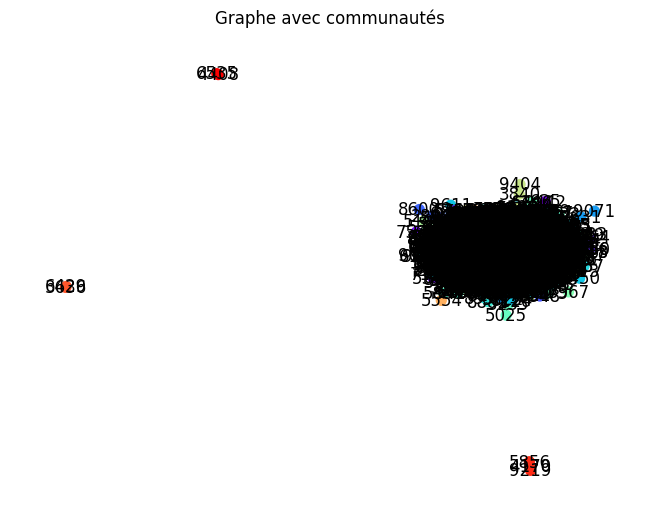

In [17]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Fixer la graine pour la reproductibilité
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

taille = 10000
link = 20000

# Créez un graphe Erdős-Rényi dans igraph avec une graine aléatoire fixe via NumPy
edges = np.random.choice(taille * (taille - 1) // 2, size=link, replace=False)
g = ig.Graph()
g.add_vertices(taille)

edge_list = []
for edge in edges:
    i = edge // (taille - 1)
    j = edge % (taille - 1)
    if j >= taille:  # Vérifier que j ne dépasse pas la taille
        j = taille - 1
    if j >= i:
        j += 1
    edge_list.append((i, j))

g.add_edges(edge_list)

# Détecter les communautés avec l'algorithme de Louvain
communities = g.community_multilevel()
modularity = g.modularity(communities)

# Convertir en graphe NetworkX
G_nx = nx.Graph(g.get_edgelist())

# Utiliser une graine fixe pour le layout de spring
pos = nx.spring_layout(G_nx, seed=seed_value)

# Colorer les nœuds en fonction des communautés uniquement pour les nœuds présents dans G_nx
node_community_map = {i: communities.membership[i] for i in G_nx.nodes}
colors = [node_community_map[node] for node in G_nx.nodes]

# Dessiner le graphe avec les couleurs de communautés
nx.draw(G_nx, pos, node_color=colors, with_labels=False, node_size=50, edge_color="gray", cmap=plt.cm.rainbow)

# Numéroter uniquement les nœuds présents dans G_nx
labels = {i: str(i + 1) for i in G_nx.nodes}
nx.draw_networkx_labels(G_nx, pos, labels=labels)

# Afficher la modularité
print(f"Modularité du partitionnement : {modularity:.4f}")

# Afficher les communautés avec le nombre de nœuds dans chaque communauté
for idx, community in enumerate(communities):
    print(f"Communauté {idx + 1}: {len(community)} nœuds - {community}")

# Afficher le graphe avec les communautés colorées
plt.title("Graphe avec communautés")
plt.show()




*   Réseau de petites tailles avec Louvain


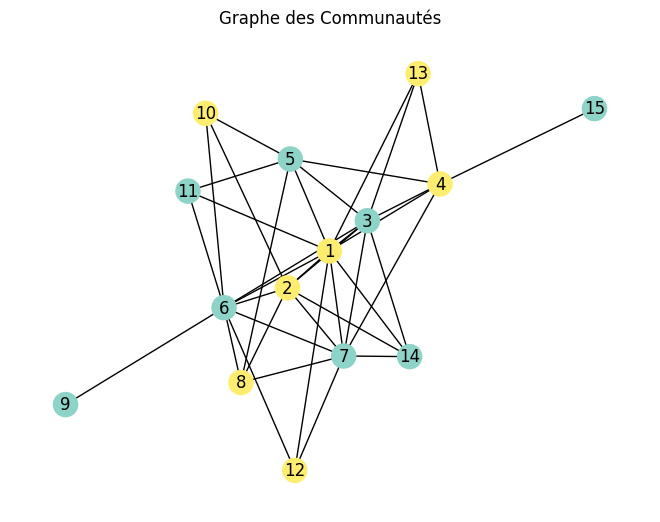

Communauté 2 : {0, 2, 3, 6, 11, 12, 13, 14} (taille : 8)
Communauté 3 : {1, 4, 5, 7, 8, 9, 10} (taille : 7)
Modularité de la partition : 0.1492


In [24]:
# Convertir le graphe igraph en graphe NetworkX
G_nx = nx.Graph(g.get_edgelist())

# Appliquer l'algorithme de Louvain pour détecter les communautés
partition = nx.algorithms.community.louvain_communities(G_nx, seed=seed_value)

# Créer un dictionnaire pour mapper chaque nœud à sa communauté
node_community = {}
for community_id, community in enumerate(partition):
    for node in community:
        node_community[node] = community_id

# Créer une liste de couleurs pour les nœuds
colors = [node_community[i] for i in range(taille)]  # Assignation de couleur selon la communauté

# Dessiner le graphe avec NetworkX et Matplotlib
pos = nx.spring_layout(G_nx, seed=seed_value)  # Utiliser l'algorithme de Fruchterman-Reingold avec graine
nx.draw(G_nx, pos, node_color=colors, node_size=300, cmap=plt.cm.Set3, with_labels=False)  # Ajustez la taille des nœuds

# Numérotez les nœuds avec des étiquettes existantes dans le graphe
labels = {node: str(node + 1) for node in G_nx.nodes()}  # Créer un dictionnaire pour les étiquettes

# Dessiner les étiquettes des nœuds
nx.draw_networkx_labels(G_nx, pos, labels=labels)

# Afficher le graphe
plt.title("Graphe des Communautés")
plt.show()

# Afficher les communautés obtenues
for i, community in enumerate(partition):
    print(f"Communauté {i+2} : {community} (taille : {len(community)})")

# Calculer la modularité de la partition obtenue
modularity_value = nx.algorithms.community.modularity(G_nx, partition)
print(f"Modularité de la partition : {modularity_value:.4f}")


## Détection d'une structure communautaire par la méthode de Clauset et all



*   Réseau de petites tailles



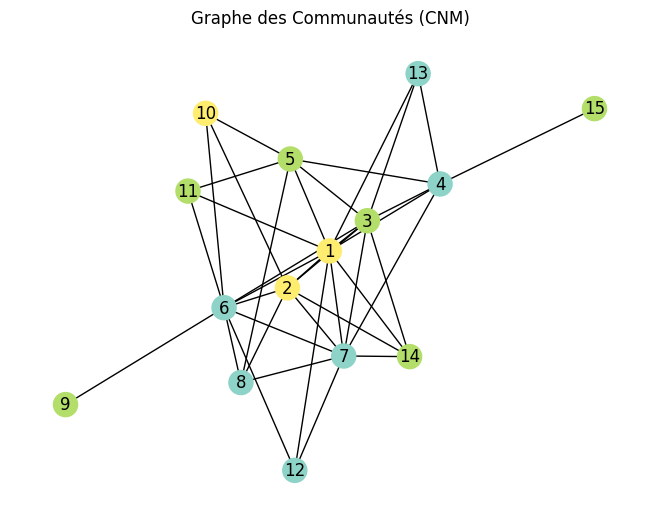

Communauté 0 : [1, 5, 6, 7, 8, 11] (taille : 6)
Communauté 1 : [0, 2, 3, 12, 13, 14] (taille : 6)
Communauté 2 : [9, 10, 4] (taille : 3)
Modularité de la partition : 0.1468


In [33]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Définir la graine aléatoire pour reproductibilité
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

taille = 15
link = 40

# Générer le graphe avec igraph et choisir des arêtes de manière aléatoire
edges = np.random.choice(taille * (taille - 1) // 2, size=link, replace=False)
g = ig.Graph()
g.add_vertices(taille)

edge_list = []
for edge in edges:
    i = edge // (taille - 1)
    j = edge % (taille - 1)
    if j >= i:
        j += 1
    edge_list.append((i, j))

g.add_edges(edge_list)

# Convertir le graphe igraph en graphe NetworkX
G_nx = nx.Graph(g.get_edgelist())

# Appliquer l'algorithme de Clauset-Newman-Moore (CNM) pour détecter les communautés
partition = nx.algorithms.community.greedy_modularity_communities(G_nx)

# Créer un dictionnaire pour mapper chaque nœud à sa communauté
node_community = {}
for community_id, community in enumerate(partition):
    for node in community:
        node_community[node] = community_id

# Créer une liste de couleurs pour les nœuds
colors = [node_community[i] for i in range(taille)]  # Assignation de couleur selon la communauté

# Dessiner le graphe avec NetworkX et Matplotlib
pos = nx.spring_layout(G_nx, seed=seed_value)  # Utiliser l'algorithme de Fruchterman-Reingold avec graine
nx.draw(G_nx, pos, node_color=colors, node_size=300, cmap=plt.cm.Set3, with_labels=False)  # Ajustez la taille des nœuds

# Numéroter les nœuds avec des étiquettes existantes dans le graphe
labels = {node: str(node + 1) for node in G_nx.nodes()}  # Créer un dictionnaire pour les étiquettes

# Dessiner les étiquettes des nœuds
nx.draw_networkx_labels(G_nx, pos, labels=labels)

# Afficher le graphe
plt.title("Graphe des Communautés (CNM)")
plt.show()

# Afficher les communautés obtenues
for i, community in enumerate(partition):
    print(f"Communauté {i} : {list(community)} (taille : {len(community)})")

# Calculer la modularité de la partition obtenue
modularity_value = nx.algorithms.community.modularity(G_nx, partition)
print(f"Modularité de la partition : {modularity_value:.4f}")




*   Grande taille de données



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Communauté 4999: 1 nœuds - [5000]
Communauté 5000: 1 nœuds - [5001]
Communauté 5001: 1 nœuds - [5002]
Communauté 5002: 1 nœuds - [5003]
Communauté 5003: 1 nœuds - [5004]
Communauté 5004: 1 nœuds - [5005]
Communauté 5005: 1 nœuds - [5006]
Communauté 5006: 1 nœuds - [5007]
Communauté 5007: 1 nœuds - [5008]
Communauté 5008: 1 nœuds - [5009]
Communauté 5009: 1 nœuds - [5010]
Communauté 5010: 1 nœuds - [5011]
Communauté 5011: 1 nœuds - [5012]
Communauté 5012: 1 nœuds - [5013]
Communauté 5013: 1 nœuds - [5014]
Communauté 5014: 1 nœuds - [5015]
Communauté 5015: 1 nœuds - [5016]
Communauté 5016: 1 nœuds - [5017]
Communauté 5017: 1 nœuds - [5018]
Communauté 5018: 1 nœuds - [5019]
Communauté 5019: 1 nœuds - [5020]
Communauté 5020: 1 nœuds - [5021]
Communauté 5021: 1 nœuds - [5022]
Communauté 5022: 1 nœuds - [5023]
Communauté 5023: 1 nœuds - [5024]
Communauté 5024: 1 nœuds - [5025]
Communauté 5025: 1 nœuds - [5026]
Comm

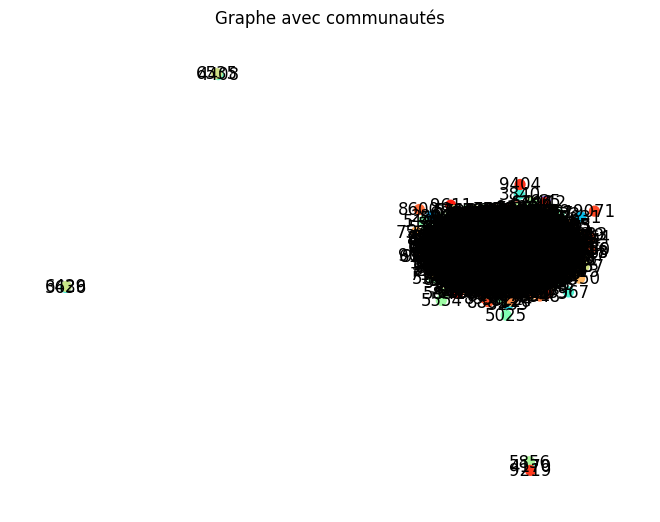

In [18]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Fixer la graine pour la reproductibilité
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

taille = 10000
link = 20000

# Créez un graphe Erdős-Rényi dans igraph avec une graine aléatoire fixe via NumPy
edges = np.random.choice(taille * (taille - 1) // 2, size=link, replace=False)
g = ig.Graph()
g.add_vertices(taille)

edge_list = []
for edge in edges:
    i = edge // (taille - 1)
    j = edge % (taille - 1)
    if j >= taille:  # Vérifier que j ne dépasse pas la taille
        j = taille - 1
    if j >= i:
        j += 1
    edge_list.append((i, j))

g.add_edges(edge_list)

# Détecter les communautés avec l'algorithme de Clauset-Newman-Moore (CNM)
communities = g.community_leiden()  # Remplacer par g.community_leiden() si CNM n'est pas disponible
modularity = g.modularity(communities)

# Convertir en graphe NetworkX
G_nx = nx.Graph(g.get_edgelist())

# Utiliser une graine fixe pour le layout de spring
pos = nx.spring_layout(G_nx, seed=seed_value)

# Colorer les nœuds en fonction des communautés uniquement pour les nœuds présents dans G_nx
node_community_map = {i: communities.membership[i] for i in G_nx.nodes}
colors = [node_community_map[node] for node in G_nx.nodes]

# Dessiner le graphe avec les couleurs de communautés
nx.draw(G_nx, pos, node_color=colors, with_labels=False, node_size=50, edge_color="gray", cmap=plt.cm.rainbow)

# Numéroter uniquement les nœuds présents dans G_nx
labels = {i: str(i + 1) for i in G_nx.nodes}
nx.draw_networkx_labels(G_nx, pos, labels=labels)

# Afficher la modularité
print(f"Modularité du partitionnement : {modularity:.4f}")

# Afficher les communautés avec le nombre de nœuds dans chaque communauté
for idx, community in enumerate(communities):
    print(f"Communauté {idx + 1}: {len(community)} nœuds - {community}")

# Afficher le graphe avec les communautés colorées
plt.title("Graphe avec communautés")
plt.show()


## Détection d'une structure communautaire avec la  méthode de Ward

On transforme tout d'abord la matrice d'adjacence en une  matrice de distance et  ensuite appliquer la méthode  

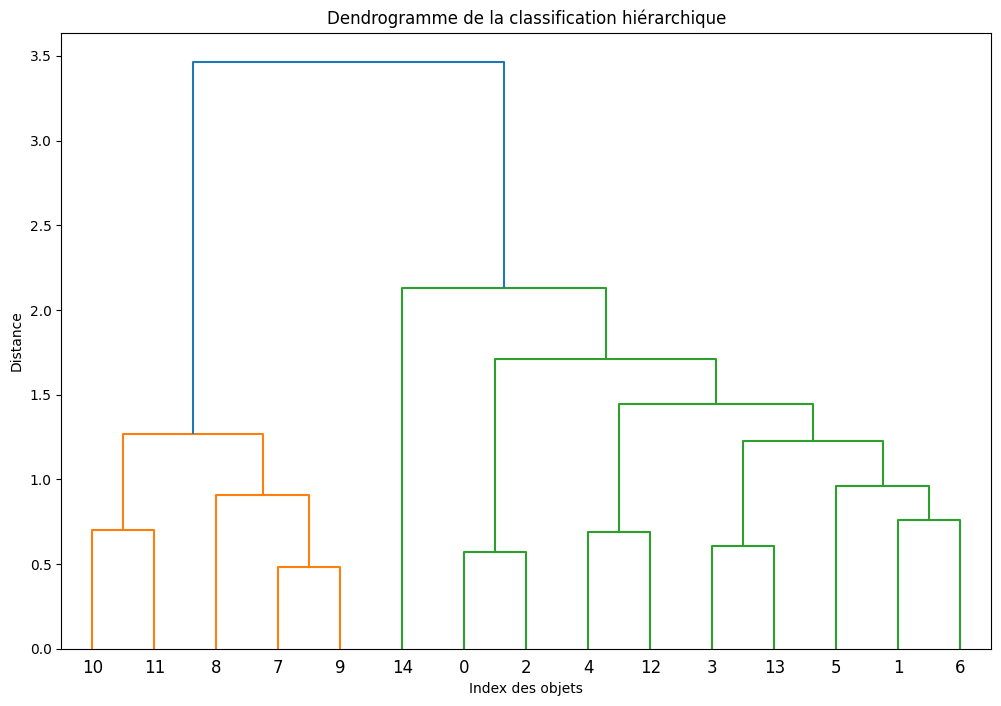

Clusters obtenus : [3 6 3 5 4 6 6 2 2 2 1 1 4 5 7]


In [29]:
from sklearn.metrics.pairwise import cosine_distances

D=cosine_distances(adjacency_matrix_ig)
# Effectuer la classification hiérarchique avec la méthode de Ward
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(-D, method='ward')
# Tracer le dendrogramme
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogramme de la classification hiérarchique')
plt.xlabel('Index des objets')
plt.ylabel('Distance')
plt.show()

# Couper le dendrogramme pour obtenir les clusters
# Vous pouvez choisir un seuil spécifique pour le découpage
max_d = 1  # Ajustez ce seuil selon votre besoin
clusters = fcluster(Z, max_d, criterion='distance')

print("Clusters obtenus :", clusters)